In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.Class.unique()

array([0, 1], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

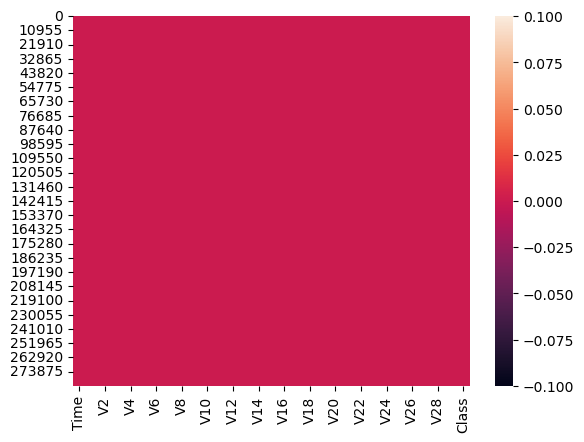

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency / Count')

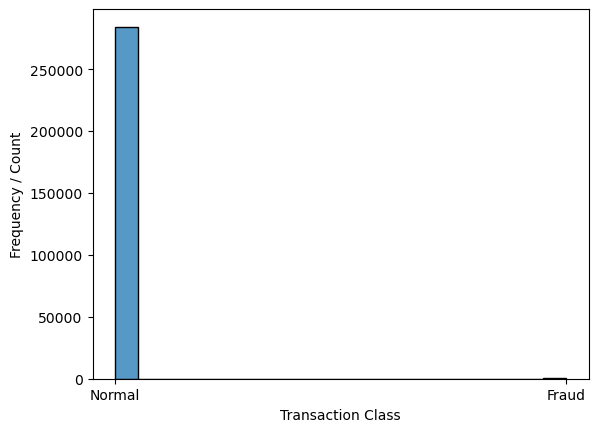

In [8]:
sns.histplot(df.Class)
plt.xticks(range(2),labels=['Normal','Fraud'])
plt.xlabel('Transaction Class')
plt.ylabel('Frequency / Count')

This is a classical case of an imbalanced dataset where normal transaction is > 250000 and fraud transactions are very few!!!

In [9]:
normal = df[df.Class==0]

fraud = df[df.Class==1]

In [10]:
fraud.shape

(492, 31)

In [11]:
normal.shape

(284315, 31)

It can be clearly seen that among 284807 transactions only 492 transactions are fraud. In other words, only 0.17% of the total 
transactions are fraud whereas 99.83% recorded transactions are normal transactions...!!!

In [12]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

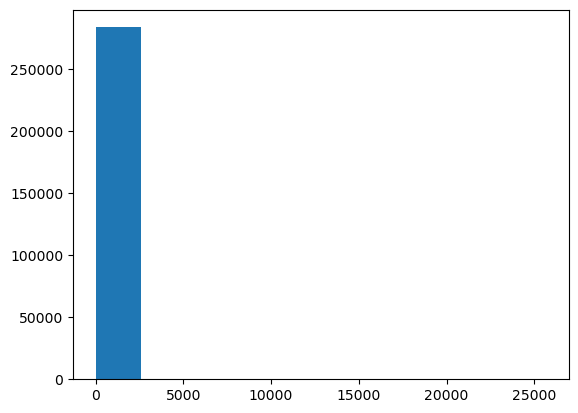

In [15]:
plt.subplots(1)
plt.hist(normal.Amount)
plt.show()

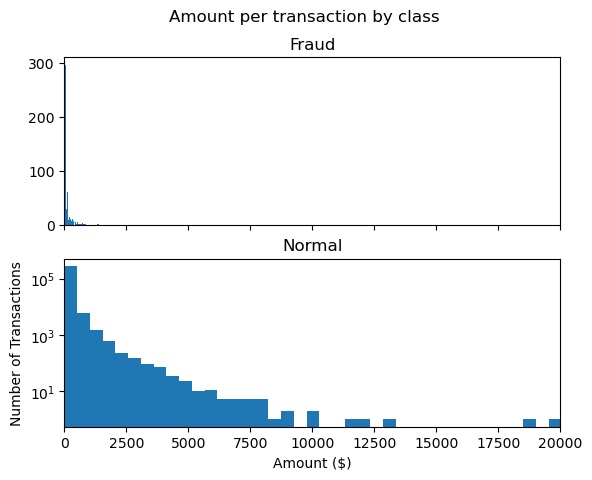

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1,sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

In [17]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'For Normal transactions')

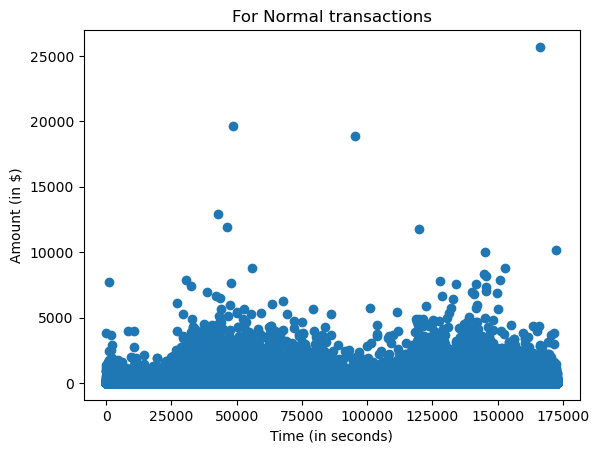

In [18]:
plt.scatter(normal.Time,normal.Amount)
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount (in $)')
plt.title('For Normal transactions')

Text(0.5, 1.0, 'For Fraudulent transactions')

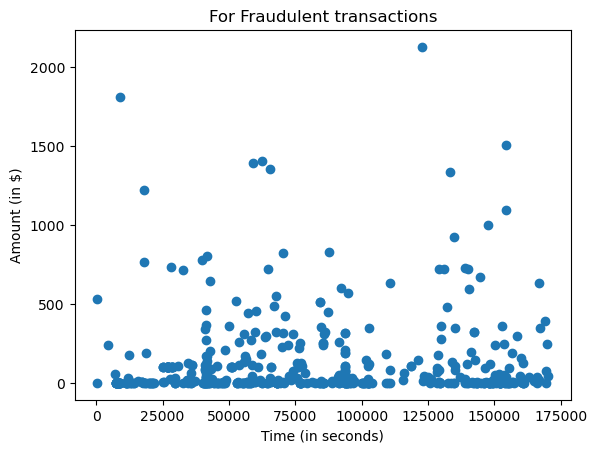

In [19]:
plt.scatter(fraud.Time,fraud.Amount)
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount (in $)')
plt.title('For Fraudulent transactions')

<Axes: >

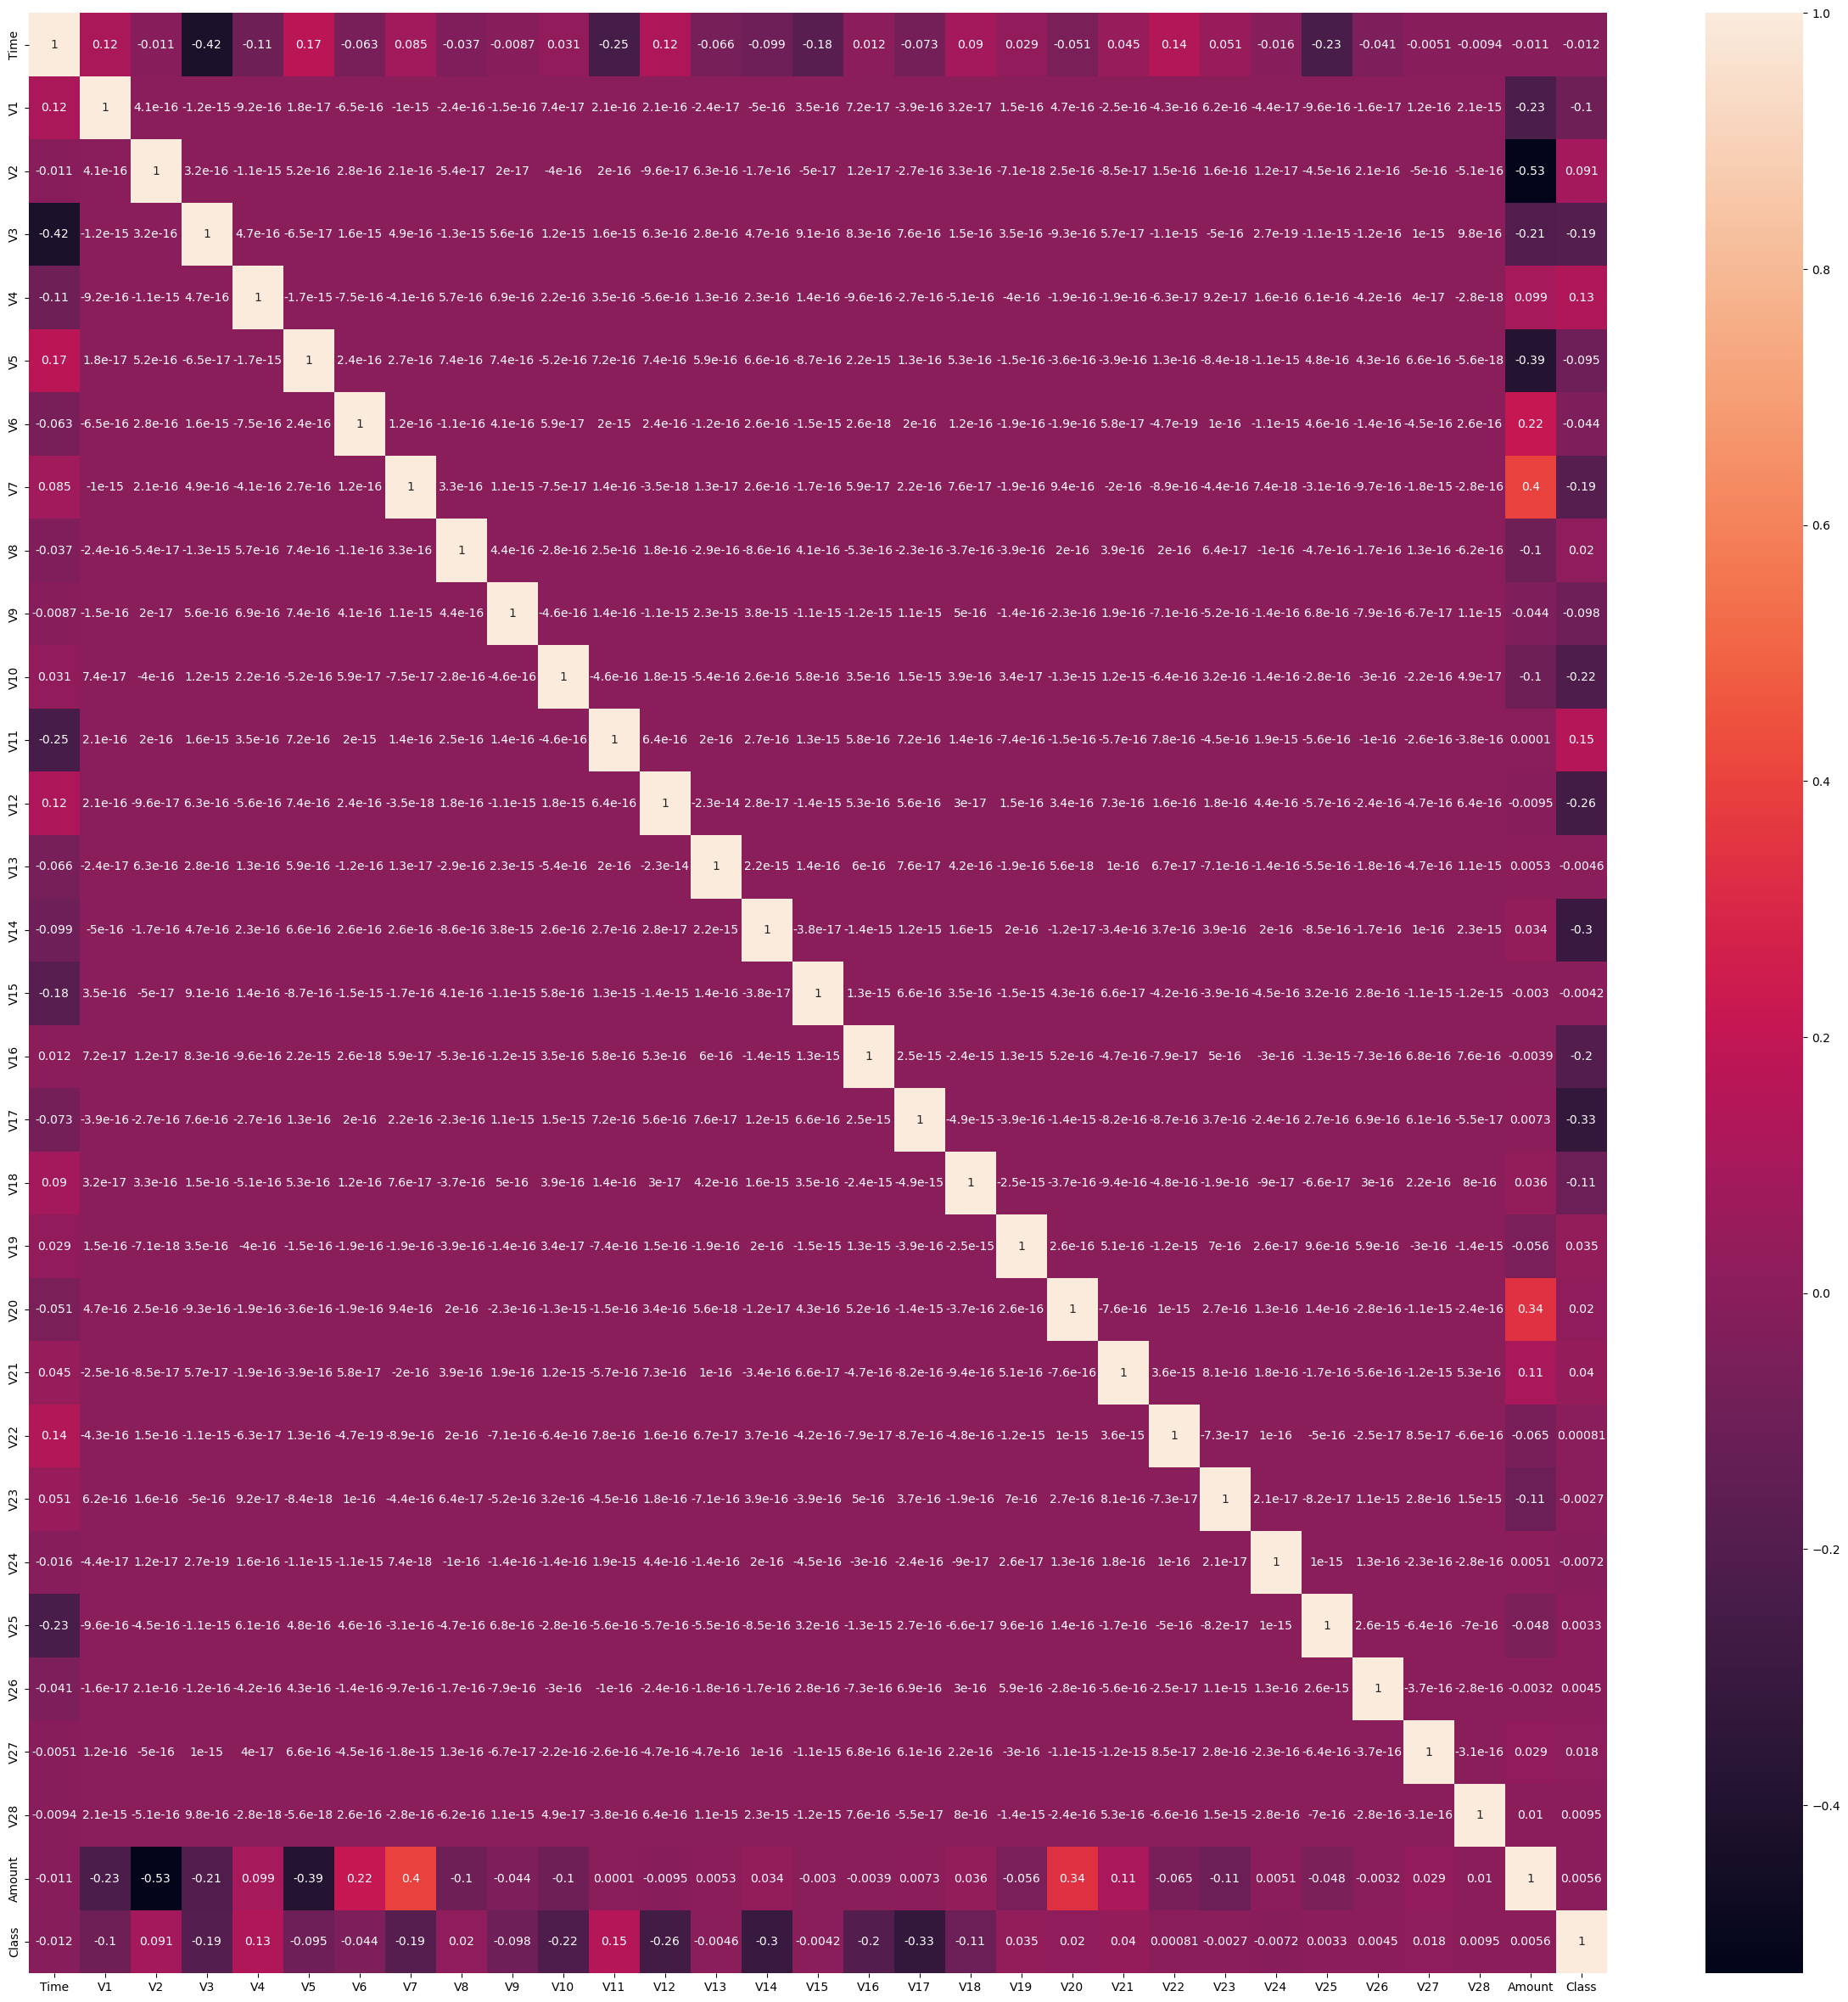

In [20]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [21]:
normal.shape

(284315, 31)

In [22]:
fraud.shape

(492, 31)

In [23]:
df_new = df.sample(frac=0.1,random_state=1)
df_new.shape

(28481, 31)

In [26]:
df_new.Class.value_counts()

0    28432
1       49
Name: Class, dtype: int64

### Defining the training & testing dataset

In [23]:
X = df_new.drop('Class',axis=1)
X.shape

NameError: name 'df_new' is not defined

In [28]:
y = df_new.Class
y.shape

(28481,)

In [33]:
fraud = df_new[df_new['Class']==1]

normal = df_new[df_new['Class']==0]

In [36]:
outlier_fraction = len(fraud)/float(len(normal))
print(outlier_fraction)

0.0017234102419808666


<Axes: >

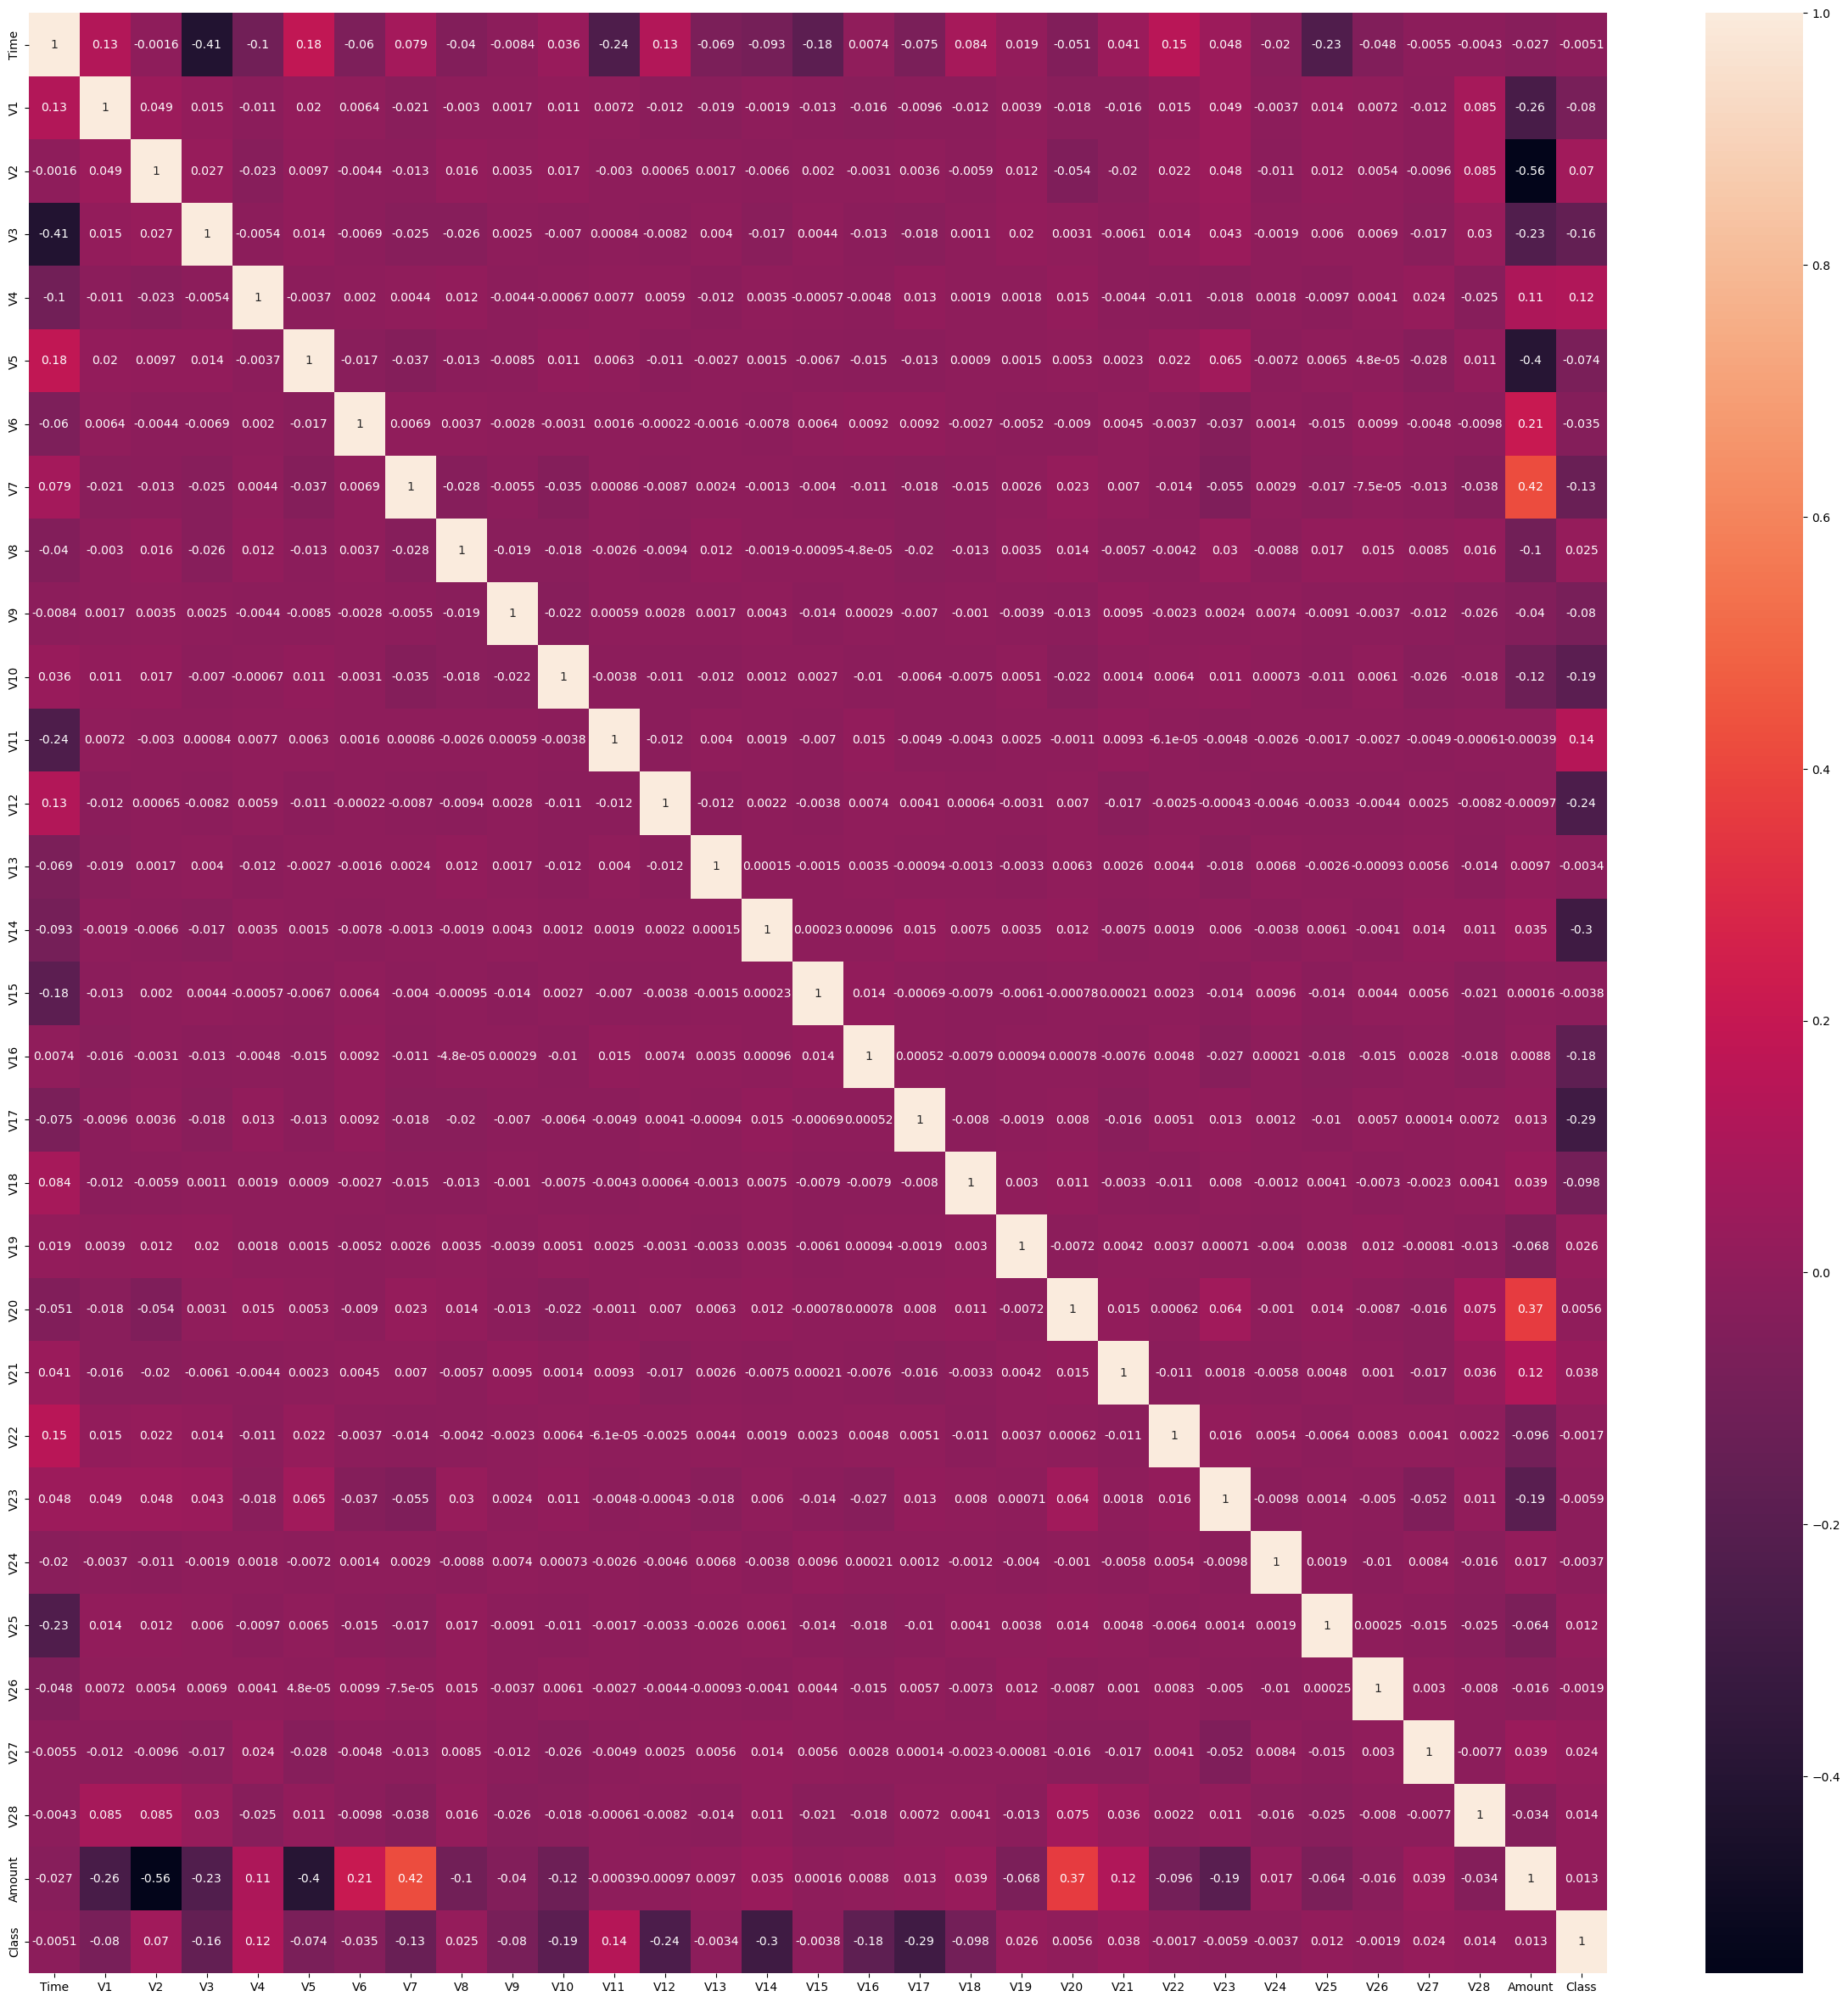

In [37]:
plt.figure(figsize=(30,30))
sns.heatmap(df_new.corr(),annot=True)

In [24]:
X = df.drop('Class',axis=1)
X.shape

(284807, 30)

In [25]:
y = df.Class
y.shape

(284807,)

### Train Test Split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [27]:
X_train.shape

(199364, 30)

In [28]:
X_test.shape

(85443, 30)

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

score = accuracy_score(y_test,y_pred)
score

C:\Users\Argha009\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9987126974839087

In [39]:
classifier = {'Isolation Forest':IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=42, verbose=0),
             "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski'),
             "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)}

In [40]:
num_outliers = len(fraud)

In [44]:
for key,value in enumerate(classifier.items()):
    if value[0]=='Isolation Forest':
       
        value[1].fit(X)
        score = value[1].decision_function(X)
        y_pred = value[1].predict(X)
        print(score)
    elif value[0]=='Local Outlier Factor':

        y_pred = value[1].fit_predict(X)
        score = value[1].negative_outlier_factor_
        print(score)
    else:
        value[1].fit(X,y)

        y_pred = value[1].predict(X)
        
        
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
        
        n_errors = (y_pred != y).sum()

        print("{}: {}".format(clf_name,n_errors))
        print("Accuracy Score :")
        print(accuracy_score(y,y_pred))
        print("Classification Report :")
        print(classification_report(y,y_pred))

C:\Users\Argha009\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


[0.22048185 0.24835425 0.24571332 ... 0.23269669 0.18899844 0.23509418]
[-1.04009684 -1.01681044 -1.02971646 ... -0.9980937  -1.05205114
 -0.99057752]
Isolation Forest: 8516
Accuracy Score :
0.7009936448860644
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     28432
           1       0.00      0.37      0.00        49

    accuracy                           0.70     28481
   macro avg       0.50      0.53      0.41     28481
weighted avg       1.00      0.70      0.82     28481



In [ ]:
num_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifier.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))

C:\Users\Argha009\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 3251
Accuracy Score :
0.8858537270461009
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     28432
           1       0.00      0.24      0.01        49

    accuracy                           0.89     28481
   macro avg       0.50      0.57      0.47     28481
weighted avg       1.00      0.89      0.94     28481



### Implementing the models

Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

score = accuracy_score(y_test,y_pred)
score

C:\Users\Argha009\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9990519995786665

In [32]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[85251,    55],
       [   26,   111]], dtype=int64)

In [39]:
f1score_logistic = f1_score(y_test,y_pred)
f1score_logistic

0.1103448275862069

K-Nearest Neighbor Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train,y_train)

y_pred = model_knn.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.9984902215512096

In [34]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[85306,     0],
       [  129,     8]], dtype=int64)

In [35]:
# Here for KNN the false positive is 0 !!

### F1 score = 2( (precision * recall) / (precision + recall) )

In [38]:
f1score_knn = f1_score(y_test,y_pred)
f1score_knn

0.1103448275862069

Decision Tree

In [46]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

score = accuracy_score(y_test,y_pred)
score

0.9991807403766253

In [47]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[85264,    42],
       [   28,   109]], dtype=int64)

In [48]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[85264,    42],
       [   28,   109]], dtype=int64)

In [49]:
f1score_dt = f1_score(y_test,y_pred)
f1score_dt

0.7569444444444444

Random Forest

In [51]:
model_rforest = RandomForestClassifier()
model_rforest.fit(X_train,y_train)
y_pred = model_rforest.predict(X_test)

score = accuracy_score(y_test,y_pred)
score

0.999602073897218

In [52]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[85297,     9],
       [   25,   112]], dtype=int64)

In [56]:
f1score_rforest = f1_score(y_test,y_pred)
f1score_rforest

0.8604651162790699

XGBoost

In [54]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)

score = accuracy_score(y_test,y_pred)
score

0.9995786664794073

In [55]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[85296,    10],
       [   26,   111]], dtype=int64)

In [57]:
f1score_xgb = f1_score(y_test,y_pred)
f1score_xgb

0.8604651162790699